<a href="https://colab.research.google.com/github/Gabriel-RCastro/regressao-linear/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

**Pergunta escolhida:**
> Condições climáticas na Segunda Guerra Mundial: existe uma relação entre a temperatura mínima e máxima diária? Você pode prever a temperatura máxima dada a temperatura mínima?

Link do conjunto de dados: https://www.kaggle.com/smid80/weatherww2/data

---
> Baixando o conjunto de dados e o extraindo.

In [1]:
!wget 'https://raw.githubusercontent.com/Gabriel-RCastro/regressao-linear/main/Summary%20of%20Weather.csv'
!unzip Summary\ of\ Weather.zip

--2021-11-20 01:31:31--  https://raw.githubusercontent.com/Gabriel-RCastro/regressao-linear/main/Summary%20of%20Weather.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11237604 (11M) [text/plain]
Saving to: ‘Summary of Weather.csv’

Summary of Weather. 100%[===================>]  10.72M  63.0MB/s    in 0.2s    

2021-11-20 01:31:32 (63.0 MB/s) - ‘Summary of Weather.csv’ saved [11237604/11237604]

unzip:  cannot find or open Summary of Weather.zip, Summary of Weather.zip.zip or Summary of Weather.zip.ZIP.


---
> Importando as bibliotecas necessárias para a execução do algoritmo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
> Lendo o conjunto de dados em formato .CSV, criando um DataFrame com ele e exibindo os cinco primeiros registros.

In [3]:
df = pd.read_csv('Summary of Weather.csv', low_memory=False)
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
> Imprimindo e analisando as informações sobre o DataFrame criado.

In [4]:
df.info

<bound method DataFrame.info of           STA        Date Precip  WindGustSpd  ...  RHX  RHN  RVG WTE
0       10001    1942-7-1  1.016          NaN  ...  NaN  NaN  NaN NaN
1       10001    1942-7-2      0          NaN  ...  NaN  NaN  NaN NaN
2       10001    1942-7-3   2.54          NaN  ...  NaN  NaN  NaN NaN
3       10001    1942-7-4   2.54          NaN  ...  NaN  NaN  NaN NaN
4       10001    1942-7-5      0          NaN  ...  NaN  NaN  NaN NaN
...       ...         ...    ...          ...  ...  ...  ...  ...  ..
119035  82506  1945-12-27      0          NaN  ...  NaN  NaN  NaN NaN
119036  82506  1945-12-28  9.906          NaN  ...  NaN  NaN  NaN NaN
119037  82506  1945-12-29      0          NaN  ...  NaN  NaN  NaN NaN
119038  82506  1945-12-30      0          NaN  ...  NaN  NaN  NaN NaN
119039  82506  1945-12-31      0          NaN  ...  NaN  NaN  NaN NaN

[119040 rows x 31 columns]>

---
> Detectando a quantidade de valores ausentes em cada coluna do DataFrame.

In [5]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

---
> Excluindo as colunas que não são necessárias para a solução a ser construída e exibindo os cinco primeiros registros após a exclusão ter sido realizada.

In [6]:
to_drop = ['STA', 'Date', 'Precip', 'WindGustSpd', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'DR', 'PRCP', 'SPD', 
           'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']

df.drop(to_drop, inplace=True, axis=1)
df.head()

,MaxTemp,MinTemp,MeanTemp
0,25.555556,22.222222,23.888889
1,28.888889,21.666667,25.555556
2,26.111111,22.222222,24.444444
3,26.666667,22.222222,24.444444
4,26.666667,21.666667,24.444444


---
> Exibindo um gráfico de dispersão da temperatura miníma vs temperatura máxima, demonstrando que existe uma relação entre as mesmas.

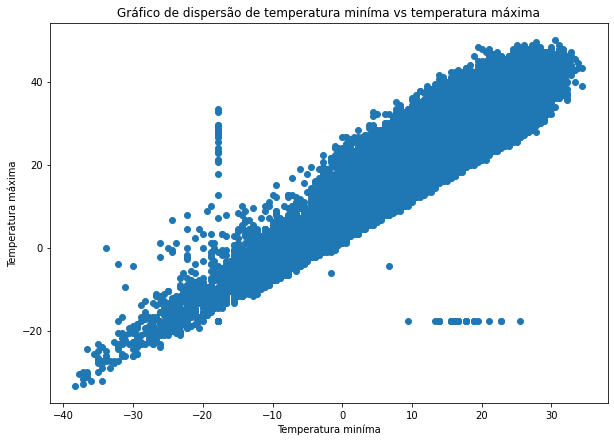

In [7]:
df.plot(x = 'MinTemp', y = 'MaxTemp', xlabel = 'Temperatura miníma', ylabel = 'Temperatura máxima', legend = False,
        style = 'o', title = 'Gráfico de dispersão de temperatura miníma vs temperatura máxima', figsize = (10, 7))
plt.show()

---
> Dividindo o conjunto de dados em 70% para aprendizado e 30% para testes.

In [8]:
X = df['MinTemp'].values.reshape(-1, 1)
y = df['MaxTemp'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

---
> Realizando o treinamento e a predição dos dados através da biblioteca de regressão linear do sci-kit learning.

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

---
> Exibindo o modelo de regressão linear que demonstra a relação entre os valores previstos das temperaturas máximas dado ao valores preditores das temperaturas minímas.

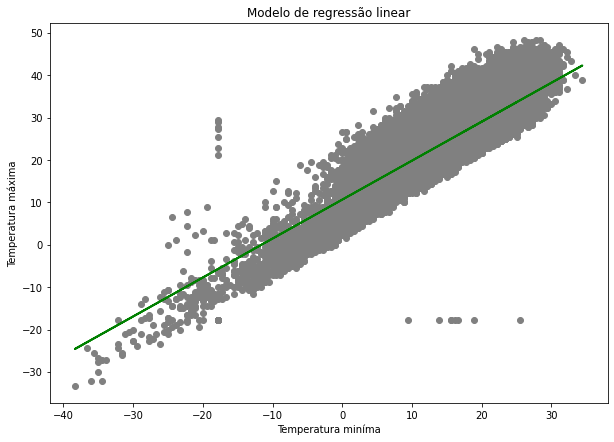

In [10]:
plt.figure(figsize = (10, 7))
plt.scatter(X_test, y_test, color = 'grey')
plt.plot(X_test, y_pred, color = 'green', linewidth = 2)
plt.title('Modelo de regressão linear')
plt.xlabel('Temperatura miníma')
plt.ylabel('Temperatura máxima')
plt.show()

---
> Exibindo o valor do coeficiente de determinação, também chamado de R², que é uma medida de ajuste da regressão linear aos valores observados de uma variável, expressando a pontuação alcançada através da aplicação dessa regressão.

In [11]:
print('R² (Coeficiente de determinação):', metrics.r2_score(y_test, y_pred))

R² (Coeficiente de determinação): 0.7701466087771792


---
Existem três métricas primárias usadas para avaliar modelos lineares. São elas:

1. Erro médio absoluto (MAE): representa o erro médio;

2. Erro quadrático médio (MSE): semelhante ao MAE, mas o ruído é exagerado e erros maiores são “punidos”;

3. Erro quadrático médio da raiz (RMSE): semelhante ao MSE, no entanto, o resultado tem raiz quadrada para torná-lo mais interpretável, pois está em unidades básicas.

Com isso, são exibidos os valores dessas métricas em relação ao modelo de regressão linear que foi obtido.

In [12]:
print('Erro médio absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Erro quadrático médio (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Erro quadrático médio da raiz (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Erro médio absoluto (MAE): 3.1974386977579874
Erro quadrático médio (MSE): 17.49813185868175
Erro quadrático médio da raiz (RMSE): 4.183076841116088


---
> A matriz de confusão é usada para informar quantas previsões foram classificadas corretamente ou incorretamente, porém um modelo de regressão fornece uma saída contínua (não classificação).

> Portanto, será proposto os valores 0 e 1 para os **yvalores**. Com isso, as previsões de regressão linear serão convertidas para qualquer uma dessas classes mencionadas.

> Para essa aplicação, será considerado como 1 se `y_pred` for maior que o valor médio das temperatunas máximas (limite de corte) e como 0 se for menor. Por fim, a matriz confusão é exibida com base nessas definições.

In [13]:
max_temp_values = df['MaxTemp'].values
cutoff = max_temp_values.sum() / len(max_temp_values)   # definindo o limite de corte                     
y_pred_classes = np.zeros_like(y_pred)                  # inicializando uma matriz cheia de zeros
y_pred_classes[y_pred >= cutoff] = 1                    # adicionando 1 se o corte for violado
y_test_classes = np.zeros_like(y_test)
y_test_classes[y_test >= cutoff] = 1
print('Matriz confusão:', metrics.confusion_matrix(y_test_classes, y_pred_classes), sep='\n') # [[tn, fp], [fn, tp]]

Matriz confusão:
[[ 9230  1949]
 [ 3244 21289]]


---
> Com base nas definições realizadas para a exibição da matriz confusão, também é possível apresentar outras métricas. Assim sendo, são exibidas as métricas acurácia, precisão, sensibilidade e escore F¹.

In [14]:
print('Acurácia:', metrics.accuracy_score(y_test_classes, y_pred_classes))
print('Precisão:', metrics.precision_score(y_test_classes, y_pred_classes))
print('Sensibilidade:', metrics.recall_score(y_test_classes, y_pred_classes))
print('F1 Score:', metrics.f1_score(y_test_classes, y_pred_classes))

Acurácia: 0.8545866935483871
Precisão: 0.9161287546260436
Sensibilidade: 0.8677699425263931
F1 Score: 0.8912938812250111
